In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. title basics

In [45]:
df_title = pd.read_csv('data/raw/title.basics.tsv.gz', sep='\t', dtype={'isAdult': 'str'})

In [46]:
df_title

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11570157,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
11570158,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
11570159,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama
11570160,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [49]:
df_title.query('tconst == "tt0036576"')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
35927,tt0036576,short,50th Anniversary of Motion Pictures,50th Anniversary of Motion Pictures,0,1944,\N,\N,Short


In [4]:
# Removendo nulos em startYear, runtimeMinutes e genres
df_title = df_title.query(r'startYear != "\\N" and runtimeMinutes != "\\N" and genres != "\\N"')
df_title

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11570112,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary
11570118,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV"
11570153,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Adventure,Animation,Comedy"
11570160,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


Identificando os tipos de titulos possiveis

In [5]:
df_title['titleType'].value_counts()

titleType
tvEpisode       1873356
short            667503
movie            414642
video            204166
tvSeries          99181
tvMovie           97638
tvSpecial         22947
tvMiniSeries      20398
tvShort            9206
videoGame           414
Name: count, dtype: int64

In [6]:
df_title[df_title['titleType']=='tvMovie']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
29761,tt0030298,tvMovie,Julius Caesar,Julius Caesar,0,1938,\N,101,"Drama,History"
38052,tt0038738,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,0,1946,\N,150,"Drama,Fantasy"
38752,tt0039445,tvMovie,Hamlet Part 1,Hamlet Part 1,0,1947,\N,88,Drama
38925,tt0039618,tvMovie,The Merchant of Venice,The Merchant of Venice,0,1947,\N,90,Drama
39359,tt0040060,tvMovie,Wit and Wisdom,Wit and Wisdom,0,1948,\N,45,Comedy
...,...,...,...,...,...,...,...,...,...
11569217,tt9914738,tvMovie,Les oubliés de la Mer de Chine,Les oubliés de la Mer de Chine,0,1981,\N,45,Documentary
11569554,tt9915520,tvMovie,Fascism i en svart bil,Fascism i en svart bil,0,2019,\N,55,"Documentary,History"
11569845,tt9916192,tvMovie,Danielle Darrieux: Il est poli d'être gai!,Danielle Darrieux: Il est poli d'être gai!,0,2019,\N,53,"Biography,Documentary,History"
11570023,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,\N,58,Family


In [7]:
# Filtrando para filmes e curtas
df_title = df_title.loc[df_title['titleType'].isin(['movie', 'short', 'tvMovie', 'tvShort'])]
df_title

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11570085,tt9916692,tvMovie,Czlowiek bez twarzy,Czlowiek bez twarzy,0,2015,\N,66,Drama
11570099,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,0,2015,\N,3,"Documentary,Short"
11570102,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama
11570112,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary


In [8]:
df_title['endYear'].unique()

array(['\\N'], dtype=object)

In [9]:
# removendo coluna endYear
df_title = df_title.drop(columns=['endYear'])
df_title

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,Short
...,...,...,...,...,...,...,...,...
11570085,tt9916692,tvMovie,Czlowiek bez twarzy,Czlowiek bez twarzy,0,2015,66,Drama
11570099,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,0,2015,3,"Documentary,Short"
11570102,tt9916730,movie,6 Gunn,6 Gunn,0,2017,116,Drama
11570112,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary


In [10]:
df_title['isAdult'].value_counts()

isAdult
0    1181344
1       7645
Name: count, dtype: int64

In [11]:
df_title.loc[df_title['isAdult']=='1']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
61182,tt0062417,movie,Un épais manteau de sang,Un épais manteau de sang,1,1968,88,"Crime,Drama"
61486,tt0062727,short,Of Special Merit,Besonders wertvoll,1,1968,11,"Adult,Short"
62363,tt0063631,movie,Space Thing,Space Thing,1,1968,70,"Comedy,Sci-Fi"
63626,tt0064929,movie,The Amorous Headmaster,Sangen om den røde rubin,1,1970,107,"Comedy,Drama"
63884,tt0065197,movie,We All Go Down,We All Go Down,1,1969,73,Drama
...,...,...,...,...,...,...,...,...
11532131,tt9834134,short,A Weekend in the Garden of Eden,A Weekend in the Garden of Eden,1,2014,10,"Adult,Short"
11532145,tt9834162,short,Be a Hero,Be a Hero,1,2015,9,"Adult,Short"
11532374,tt9834658,short,Entre dos sueños,Entre dos sueños,1,2010,21,"Adult,Short"
11544237,tt9860530,short,Shower Time For The Girls,Shower Time For The Girls,1,2006,7,"Adult,Short"


In [12]:
# Removendo filmes adultos
df_title = df_title.loc[df_title['isAdult']=='0'].drop(columns=['isAdult'])
df_title

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,Short
...,...,...,...,...,...,...,...
11570085,tt9916692,tvMovie,Czlowiek bez twarzy,Czlowiek bez twarzy,2015,66,Drama
11570099,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,2015,3,"Documentary,Short"
11570102,tt9916730,movie,6 Gunn,6 Gunn,2017,116,Drama
11570112,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,49,Documentary


In [13]:
df_title['startYear'] = df_title['startYear'].astype(int)
df_title['runtimeMinutes'] = df_title['runtimeMinutes'].astype(int)

In [14]:
df_title['startYear'].describe()

count    1.181344e+06
mean     2.002641e+03
std      2.435439e+01
min      1.874000e+03
25%      1.999000e+03
50%      2.012000e+03
75%      2.018000e+03
max      2.030000e+03
Name: startYear, dtype: float64

In [15]:
# Retirando filmes com lançamento em 2025 ou posterior
df_title = df_title[df_title['startYear']<2025]

Text(0, 0.5, 'Number of Movies')

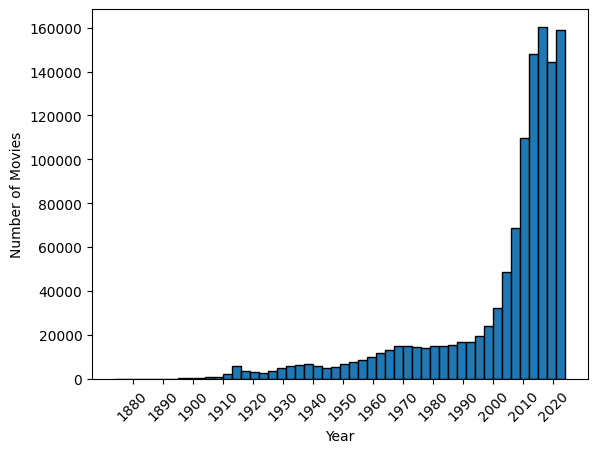

In [16]:
plt.hist(df_title['startYear'], bins=50, edgecolor='black')
plt.xticks([i for i in range(1880, 2030, 10)], rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Movies')

Identificando os generos de filmes possiveis

In [17]:
aux = list(df_title['genres'].unique())
unique_genres = set([])

for element in aux:
    if element != '\\N':
        for genre in element.split(','):
            unique_genres.add(genre)


unique_genres = sorted(list(unique_genres))
unique_genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [18]:
df_title[df_title['genres'].str.contains('Adult', na=False)]

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
119950,tt0123158,movie,The Love Garden,The Love Garden,1971,72,"Adult,Romance"
8443780,tt35126920,short,Amateur Film by Omar Gaber,Amateur Film by Omar Gaber,2024,3,"Adult,Biography,Drama"


In [19]:
df_title = df_title[~df_title['genres'].str.contains('Adult', na=False)]
df_title

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,Short
...,...,...,...,...,...,...,...
11570085,tt9916692,tvMovie,Czlowiek bez twarzy,Czlowiek bez twarzy,2015,66,Drama
11570099,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,2015,3,"Documentary,Short"
11570102,tt9916730,movie,6 Gunn,6 Gunn,2017,116,Drama
11570112,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,49,Documentary


In [20]:
df_title.loc[df_title['runtimeMinutes'] > 1000]

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
4009,tt0004052,movie,The Hazards of Helen,The Hazards of Helen,1914,1428,Action
159620,tt0165127,movie,Burning of the Red Lotus Temple,Huo shao hong lian si,1928,1620,Drama
172861,tt0179184,movie,****,****,1967,1500,Drama
270496,tt0282642,tvMovie,Johann Wolfgang von Goethe: Faust II,Johann Wolfgang von Goethe: Faust II,2001,1320,Drama
271810,tt0284020,movie,The Cure for Insomnia,The Cure for Insomnia,1987,5220,"Documentary,Music"
327897,tt0342707,movie,The Longest Most Meaningless Movie in the World,The Longest Most Meaningless Movie in the World,1970,2880,"Documentary,Drama,History"
370788,tt0387271,movie,A Twist of Fate,Hanmanheun namilsaeng,1970,1970,Drama
385801,tt0402721,tvMovie,24 Hours of Midnights from Times Square,24 Hours of Midnights from Times Square,1999,1500,Documentary
795790,tt0821950,movie,A Mosca cieca,A Mosca cieca,1921,1035,Drama
1311887,tt10623190,tvMovie,Bjørndalen: Seier for seier,Bjørndalen: Seier for seier,2018,3300,"Documentary,Sport"


## 2. title ratings

In [21]:
df_temp = pd.read_csv('data/raw/title.ratings.tsv.gz', sep='\t')
df_temp

,tconst,averageRating,numVotes
0,tt0000001,5.7,2148
1,tt0000002,5.5,292
2,tt0000003,6.5,2184
3,tt0000004,5.3,188
4,tt0000005,6.2,2931
...,...,...,...
1560377,tt9916846,5.8,6
1560378,tt9916848,5.8,6
1560379,tt9916850,5.8,6
1560380,tt9916852,5.8,6


In [22]:
df_temp.describe()

,averageRating,numVotes
count,1.560382e+06,1.560382e+06
mean,6.950432e+00,1.022619e+03
std,1.386595e+00,1.781673e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.000000e+02
max,1.000000e+01,3.032739e+06


Text(0, 0.5, 'Number of Movies')

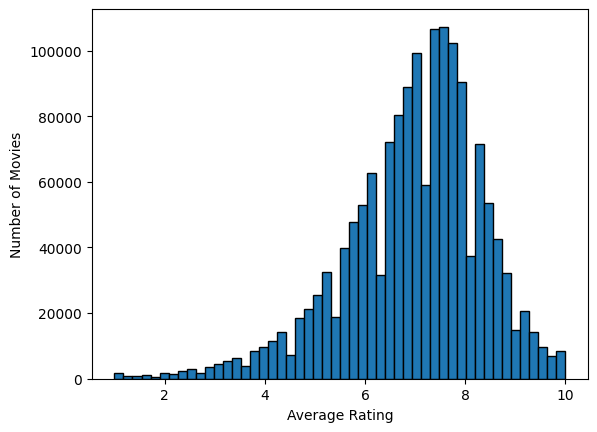

In [23]:
plt.hist(df_temp['averageRating'], bins=50, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Number of Movies in log scale')

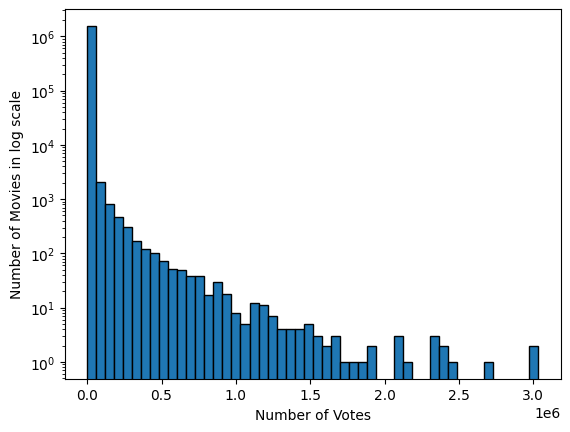

In [24]:
plt.hist(df_temp['numVotes'], bins=50, edgecolor='black', log=True)
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies in log scale')

In [25]:
df_title = df_title.merge(df_temp, on='tconst', how='left')
df_title

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2148.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short",5.5,292.0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance",6.5,2184.0
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short",5.3,188.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,Short,6.2,2931.0
...,...,...,...,...,...,...,...,...,...
1172656,tt9916692,tvMovie,Czlowiek bez twarzy,Czlowiek bez twarzy,2015,66,Drama,NaN,NaN
1172657,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,2015,3,"Documentary,Short",NaN,NaN
1172658,tt9916730,movie,6 Gunn,6 Gunn,2017,116,Drama,7.0,13.0
1172659,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,49,Documentary,NaN,NaN


Filmes sem avaliação

In [26]:
df_title[df_title['numVotes'].isna()]

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
109,tt0000250,short,Llegada del vapor Bellver a Mallorca,Llegada del vapor Bellver a Mallorca,1899,3,"Documentary,Short",NaN,NaN
134,tt0000322,short,Panorama de Barcelona: monumentos y fiestas,Panorama de Barcelona: monumentos y fiestas,1900,6,"Documentary,Short",NaN,NaN
136,tt0000332,short,Retour des champs,Retour des champs,1900,2,"Documentary,Short",NaN,NaN
153,tt0000369,short,A Road for Children's Bicycles in Barcelona,Pista de bicicletas para niños en Barcelona,1901,3,"Documentary,Short",NaN,NaN
158,tt0000382,short,Carnaval en las ramblas,Carnaval en las ramblas,1902,9,"Documentary,Short",NaN,NaN
...,...,...,...,...,...,...,...,...,...
1172655,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary,NaN,NaN
1172656,tt9916692,tvMovie,Czlowiek bez twarzy,Czlowiek bez twarzy,2015,66,Drama,NaN,NaN
1172657,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,2015,3,"Documentary,Short",NaN,NaN
1172659,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,49,Documentary,NaN,NaN


Removendo filmes sem avaliação

In [27]:
df_title = df_title.dropna()
df_title

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2148.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short",5.5,292.0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance",6.5,2184.0
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short",5.3,188.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,Short,6.2,2931.0
...,...,...,...,...,...,...,...,...,...
1172646,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0
1172647,tt9916362,movie,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0
1172648,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0
1172649,tt9916544,short,My Sweet Prince,My Sweet Prince,2019,12,"Drama,Short",6.8,81.0


## 3. title crew

In [28]:
df_temp = pd.read_csv('data/raw/title.crew.tsv.gz', sep='\t', compression='gzip')
df_temp

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
11599793,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11599794,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
11599795,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11599796,tt9916856,nm10538645,nm6951431


In [29]:
df_title = df_title.merge(df_temp, on='tconst', how='left')
df_title

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2148.0,nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short",5.5,292.0,nm0721526,\N
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance",6.5,2184.0,nm0721526,nm0721526
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short",5.3,188.0,nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,Short,6.2,2931.0,nm0005690,\N
...,...,...,...,...,...,...,...,...,...,...,...
480388,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0,nm1480867,"nm1480867,nm10538402,nm5584269"
480389,tt9916362,movie,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0,nm1893148,"nm1893148,nm3471432"
480390,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0,nm4457074,"nm4843252,nm4900525,nm2679404"
480391,tt9916544,short,My Sweet Prince,My Sweet Prince,2019,12,"Drama,Short",6.8,81.0,nm3219235,nm3219235


## 4.

In [30]:
df_temp = pd.read_csv('data/raw/title.principals.tsv.gz', sep='\t', compression='gzip')
df_temp

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N
...,...,...,...,...,...,...
92101005,tt9916880,17,nm0996406,director,principal director,\N
92101006,tt9916880,18,nm1482639,writer,\N,\N
92101007,tt9916880,19,nm2586970,writer,books,\N
92101008,tt9916880,20,nm1594058,producer,producer,\N


In [31]:
df_temp = df_temp[df_temp['tconst'].isin(df_title['tconst'])]
df_temp

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N
...,...,...,...,...,...,...
92100056,tt9916730,10,nm10538612,writer,\N,\N
92100057,tt9916730,11,nm10538614,producer,producer,\N
92100058,tt9916730,12,nm10538613,producer,associate producer,\N
92100059,tt9916730,13,nm1957275,cinematographer,\N,\N


In [32]:
df_temp = df_temp[df_temp['category'].isin(['actor', 'actress'])]
df_temp

,tconst,ordering,nconst,category,job,characters
14,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
15,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
17,tt0000007,1,nm0179163,actor,\N,\N
18,tt0000007,2,nm0183947,actor,\N,\N
24,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"
...,...,...,...,...,...,...
92100050,tt9916730,4,nm4852679,actor,\N,\N
92100051,tt9916730,5,nm9050497,actor,\N,\N
92100052,tt9916730,6,nm7365126,actress,\N,\N
92100053,tt9916730,7,nm1576284,actress,\N,\N


In [33]:
df_temp = df_temp.drop(columns=['job'])

In [34]:
df_temp

,tconst,ordering,nconst,category,characters
14,tt0000005,1,nm0443482,actor,"[""Blacksmith""]"
15,tt0000005,2,nm0653042,actor,"[""Assistant""]"
17,tt0000007,1,nm0179163,actor,\N
18,tt0000007,2,nm0183947,actor,\N
24,tt0000008,1,nm0653028,actor,"[""Sneezing Man""]"
...,...,...,...,...,...
92100050,tt9916730,4,nm4852679,actor,\N
92100051,tt9916730,5,nm9050497,actor,\N
92100052,tt9916730,6,nm7365126,actress,\N
92100053,tt9916730,7,nm1576284,actress,\N


In [35]:
df_temp['person'] = '('+df_temp['nconst']+','+df_temp['category']+','+df_temp['characters']+')'

In [36]:
df_temp = df_temp.drop(columns=['ordering', 'nconst', 'category', 'characters'])
df_temp

,tconst,person
14,tt0000005,"(nm0443482,actor,[""Blacksmith""])"
15,tt0000005,"(nm0653042,actor,[""Assistant""])"
17,tt0000007,"(nm0179163,actor,\N)"
18,tt0000007,"(nm0183947,actor,\N)"
24,tt0000008,"(nm0653028,actor,[""Sneezing Man""])"
...,...,...
92100050,tt9916730,"(nm4852679,actor,\N)"
92100051,tt9916730,"(nm9050497,actor,\N)"
92100052,tt9916730,"(nm7365126,actress,\N)"
92100053,tt9916730,"(nm1576284,actress,\N)"


In [37]:
df_temp = df_temp[['tconst', 'person']].groupby('tconst').agg('sum').reset_index()
df_temp

,tconst,person
0,tt0000005,"(nm0443482,actor,[""Blacksmith""])(nm0653042,act..."
1,tt0000007,"(nm0179163,actor,\N)(nm0183947,actor,\N)"
2,tt0000008,"(nm0653028,actor,[""Sneezing Man""])"
3,tt0000009,"(nm0063086,actress,[""Miss Geraldine Holbrook (..."
4,tt0000011,"(nm3692297,actor,[""Acrobats""])"
...,...,...
404964,tt9916270,"(nm0144812,actor,[""Ascoltatore""])(nm3080119,ac..."
404965,tt9916362,"(nm3766704,actress,[""Ana""])(nm0107165,actor,[""..."
404966,tt9916538,"(nm8678236,actress,[""Sinta""])(nm1417182,actres..."
404967,tt9916544,"(nm9424215,actor,[""Tommy""])(nm9873304,actor,[""..."


In [38]:
df_temp['person'] = df_temp['person'].str.replace(')(', '),(')
df_temp

,tconst,person
0,tt0000005,"(nm0443482,actor,[""Blacksmith""]),(nm0653042,ac..."
1,tt0000007,"(nm0179163,actor,\N),(nm0183947,actor,\N)"
2,tt0000008,"(nm0653028,actor,[""Sneezing Man""])"
3,tt0000009,"(nm0063086,actress,[""Miss Geraldine Holbrook (..."
4,tt0000011,"(nm3692297,actor,[""Acrobats""])"
...,...,...
404964,tt9916270,"(nm0144812,actor,[""Ascoltatore""]),(nm3080119,a..."
404965,tt9916362,"(nm3766704,actress,[""Ana""]),(nm0107165,actor,[..."
404966,tt9916538,"(nm8678236,actress,[""Sinta""]),(nm1417182,actre..."
404967,tt9916544,"(nm9424215,actor,[""Tommy""]),(nm9873304,actor,[..."


In [39]:
df_title = df_title.merge(df_temp, on='tconst', how='left')
df_title

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,person
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2148.0,nm0005690,\N,NaN
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short",5.5,292.0,nm0721526,\N,NaN
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance",6.5,2184.0,nm0721526,nm0721526,NaN
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short",5.3,188.0,nm0721526,\N,NaN
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,Short,6.2,2931.0,nm0005690,\N,"(nm0443482,actor,[""Blacksmith""]),(nm0653042,ac..."
...,...,...,...,...,...,...,...,...,...,...,...,...
480388,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0,nm1480867,"nm1480867,nm10538402,nm5584269","(nm0144812,actor,[""Ascoltatore""]),(nm3080119,a..."
480389,tt9916362,movie,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0,nm1893148,"nm1893148,nm3471432","(nm3766704,actress,[""Ana""]),(nm0107165,actor,[..."
480390,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0,nm4457074,"nm4843252,nm4900525,nm2679404","(nm8678236,actress,[""Sinta""]),(nm1417182,actre..."
480391,tt9916544,short,My Sweet Prince,My Sweet Prince,2019,12,"Drama,Short",6.8,81.0,nm3219235,nm3219235,"(nm9424215,actor,[""Tommy""]),(nm9873304,actor,[..."


In [40]:
df_title['numVotes'] = df_title['numVotes'].astype(int)
df_title

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,person
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2148,nm0005690,\N,NaN
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short",5.5,292,nm0721526,\N,NaN
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,1892,5,"Animation,Comedy,Romance",6.5,2184,nm0721526,nm0721526,NaN
3,tt0000004,short,Un bon bock,Un bon bock,1892,12,"Animation,Short",5.3,188,nm0721526,\N,NaN
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,1,Short,6.2,2931,nm0005690,\N,"(nm0443482,actor,[""Blacksmith""]),(nm0653042,ac..."
...,...,...,...,...,...,...,...,...,...,...,...,...
480388,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506,nm1480867,"nm1480867,nm10538402,nm5584269","(nm0144812,actor,[""Ascoltatore""]),(nm3080119,a..."
480389,tt9916362,movie,Coven,Akelarre,2020,92,"Drama,History",6.4,6033,nm1893148,"nm1893148,nm3471432","(nm3766704,actress,[""Ana""]),(nm0107165,actor,[..."
480390,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9,nm4457074,"nm4843252,nm4900525,nm2679404","(nm8678236,actress,[""Sinta""]),(nm1417182,actre..."
480391,tt9916544,short,My Sweet Prince,My Sweet Prince,2019,12,"Drama,Short",6.8,81,nm3219235,nm3219235,"(nm9424215,actor,[""Tommy""]),(nm9873304,actor,[..."


In [41]:
df_title.to_csv('data/processed/title.tsv.gz', sep='\t', compression='gzip', index=False)

In [42]:
df_title_sample = df_title.sample(5000, random_state=42)
df_title_sample

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,person
229803,tt1253585,short,The Legend of My Heart Shaped Anus,The Legend of My Heart Shaped Anus,2008,24,"Comedy,Short",7.4,14,nm0841430,nm0841430,"(nm3059522,actor,[""Oliver""]),(nm3059178,actres..."
92181,tt0155667,movie,Didn't Do It for Love,Didn't Do It for Love,1997,81,Documentary,7.2,42,nm0872331,nm0872331,"(nm0928411,actress,[""Barbara White""])"
284306,tt17042556,tvMovie,I'M Possible,I'M Possible,2021,233,"Animation,Drama",8.2,16,"nm13303469,nm13303541",nm13303541,NaN
117592,tt0237655,short,Patinoire,Patinoire,1963,10,"Documentary,Short",6.7,38,nm0137345,\N,NaN
453913,tt7509568,short,Vikaari,Vikaari,2020,15,"Action,Drama,Mystery",7.1,37,"nm2781874,nm3359797","nm2781874,nm3359797","(nm12122202,actress,[""Vikaari""]),(nm12122204,a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
172739,tt0455971,movie,Little Peace of Mine,Shalom Katan Sheli,2004,56,Documentary,8.2,21,nm1907205,\N,NaN
182752,tt0765015,short,Neon Flesh,Carne de neón,2005,15,"Comedy,Short",6.2,159,nm2161247,nm2161247,"(nm1049982,actor,[""Ricky""]),(nm0174287,actor,[..."
390556,tt3843844,short,Orages d'été,Orages d'été,2014,21,"Drama,Short",5.4,11,nm2631554,nm2631554,"(nm1078678,actress,\N),(nm6468419,actor,\N),(n..."
423672,tt5649246,movie,Sivi,Sivi,2007,108,"Horror,Mystery,Thriller",6.6,61,\N,nm4977216,"(nm3607224,actress,[""Nandhini""]),(nm7768997,ac..."


In [43]:
df_title_sample.to_csv('data/processed/title_sampled.tsv.gz', sep='\t', compression='gzip', index=False)